# Stay Alert! The Ford Challenge
Driving while not alert can be deadly. The objective is to design a classifier that will detect whether the driver is alert or not alert, employing data that are acquired while driving.
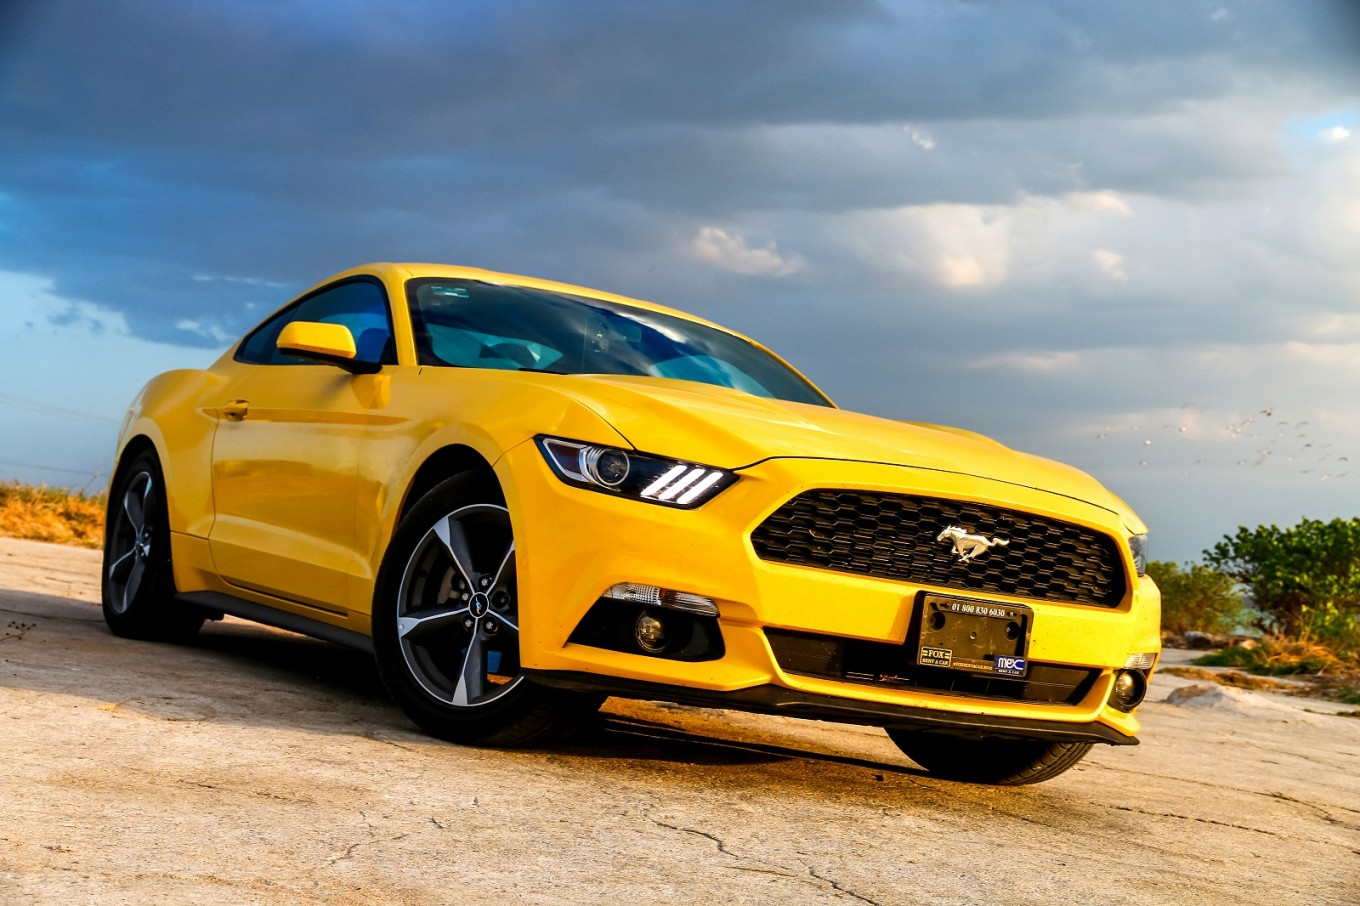

The data for this challenge shows the results of a number of "trials", each one representing about 2 minutes of sequential data that are recorded every 100 ms during a driving session on the road or in a driving simulator.  The trials are samples from some 100 drivers of both genders, and of different ages and ethnic backgrounds. The files are structured as follows:

The first column is the Trial ID - each period of around 2 minutes of sequential data has a unique trial ID. For instance, the first 1210 observations represent sequential observations every 100ms, and therefore all have the same trial ID.

The second column is the observation number - this is a sequentially increasing number within one trial ID.

The third column has a value X for each row where:

               X = 1   ,  if the driver is alert
               X = 0   ,  if the driver is not alert
               
The next 8 columns with headers P1, P2 , …….., P8  represent **physiological data**;

The next 11 columns with headers E1, E2, …….., E11  represent **environmental data**;

The next 11 columns with headers V1, V2, …….., V11  represent **vehicular  data**;

The third column values are hidden in the test set ('fordTest.csv').

The file 'example_submission.csv' is an example of a submission file - your submission files should be in exactly the same format, with only values in the last column ('Prediction') different. Predictions are expected to be real numbers between 0 and 1 inclusive.
 
Note:  The actual names and measurement units of the physiological, environmental and vehicular data are not disclosed in this challenge. Models which use fewer physiological variables (columns with names starting with 'P') are of particular interest, therefore competitors are encouraged to consider models which require fewer of these variables.

### Importing necessary python libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<IPython.core.display.Javascript object>

### Loading the data into Pandas dataframes

In [3]:
train_df = pd.read_csv('./fordTrain.csv')
test_df = pd.read_csv('./fordTest.csv')
submission_df = pd.read_csv('./example_submission.csv')
sol_df = pd.read_csv('./Solution.csv')

In [4]:
train_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [5]:
test_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


In [6]:
submission_df

,TrialID,ObsNum,Prediction
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
120835,99,1206,0
120836,99,1207,0
120837,99,1208,0
120838,99,1209,0


In [7]:
sol_df 
#This file was provided after the completion of the challenge.
#We will use this file at times when we want to see the score of the test dataset that our model
#predicts

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

In [10]:
train_df.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [11]:
train_df.corr()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
TrialID,1.000000,-0.000162,-0.145816,0.016772,-0.004473,0.000369,0.001880,0.022632,0.005377,0.111903,NaN,-0.061881,0.015610,-0.087071,-0.050151,0.234524,-0.034418,-0.116919,-0.095434,0.116988,-0.100521,0.073676,-0.117728,0.065063,0.001900,-0.074320,0.123721,-0.097389,NaN,-0.047593,NaN,-0.093818,0.078887
ObsNum,-0.000162,1.000000,-0.005143,0.018324,-0.001764,0.002199,-0.001191,0.005568,-0.015791,0.003498,NaN,-0.000122,-0.003558,0.002931,-0.004580,0.010314,-0.003838,0.002005,0.009400,-0.002779,-0.008684,0.004978,0.004242,0.019009,0.007753,-0.000480,-0.006284,0.003935,NaN,0.008191,NaN,0.005145,-0.011465
IsAlert,-0.145816,-0.005143,1.000000,0.018361,0.014383,0.005168,-0.008177,0.038160,-0.000400,0.189796,NaN,-0.160830,-0.105495,0.157973,0.047992,-0.067453,-0.189198,-0.329722,-0.283440,0.380353,-0.067051,0.079002,-0.269967,-0.050740,-0.062000,0.097022,0.055429,-0.244150,NaN,-0.165550,NaN,-0.259607,0.155722
P1,0.016772,0.018324,0.018361,1.000000,-0.006674,-0.010317,0.011704,0.010911,0.045429,0.027461,NaN,-0.015436,-0.009356,0.024131,-0.010574,-0.006564,-0.004635,-0.013194,-0.010918,0.004688,0.004549,0.015882,-0.025763,-0.021118,0.002551,0.021404,0.051348,-0.019792,NaN,-0.029747,NaN,-0.004563,0.344636
P2,-0.004473,-0.001764,0.014383,-0.006674,1.000000,-0.002539,0.002132,0.008390,-0.022003,0.052171,NaN,-0.012045,-0.019121,0.062076,0.003529,-0.005140,-0.006843,-0.002058,0.002920,0.002266,0.014589,0.001857,0.011310,0.001779,0.002272,-0.006038,-0.023902,0.010608,NaN,0.008257,NaN,0.001946,-0.034248
P3,0.000369,0.002199,0.005168,-0.010317,-0.002539,1.000000,-0.944435,0.035129,0.012444,-0.006097,NaN,0.005795,0.013007,-0.016437,0.000515,0.004496,-0.004508,-0.014086,-0.014135,0.018113,-0.013289,0.007423,-0.011347,0.008651,-0.006380,0.013045,0.001312,-0.010245,NaN,-0.007963,NaN,-0.009630,-0.009808
P4,0.001880,-0.001191,-0.008177,0.011704,0.002132,-0.944435,1.000000,-0.032897,-0.010627,0.007323,NaN,-0.004870,-0.010749,0.010696,0.001580,-0.003086,0.004230,0.013755,0.012959,-0.016615,0.010501,-0.005681,0.010061,-0.006926,0.008049,-0.010905,0.001705,0.008348,NaN,0.005379,NaN,0.008906,0.009841
P5,0.022632,0.005568,0.038160,0.010911,0.008390,0.035129,-0.032897,1.000000,0.002314,-0.023628,NaN,-0.062955,-0.033420,0.069444,-0.002757,-0.020218,-0.006387,-0.032576,-0.048551,0.005177,-0.074753,0.028216,-0.054428,0.026232,0.005371,0.070290,-0.016671,-0.046353,NaN,-0.023359,NaN,-0.022193,-0.004897
P6,0.005377,-0.015791,-0.000400,0.045429,-0.022003,0.012444,-0.010627,0.002314,1.000000,-0.125580,NaN,-0.006273,0.006025,-0.025157,-0.001288,-0.007514,0.011529,-0.006923,-0.008941,-0.005549,-0.034470,-0.008939,-0.024449,-0.010418,-0.004996,0.019121,0.029222,-0.025728,NaN,-0.016850,NaN,-0.002163,0.012783
P7,0.111903,0.003498,0.189796,0.027461,0.052171,-0.006097,0.007323,-0.023628,-0.125580,1.000000,NaN,-0.087373,-0.091327,0.294528,0.026627,0.051338,-0.105148,-0.042634,0.022973,0.045725,0.109924,0.084846,-0.043512,0.025850,0.007986,0.037711,0.024499,-0.020696,NaN,-0.008450,NaN,-0.041814,0.019360


### Reducing RAM usage

In [12]:
x=['P3','P6','E3','E4','E6','E7','E8','E9','E10','V3','V5','V6','V10','IsAlert']
for i in x:
    train_df[i]=train_df[i].astype('int16')

y=['P1','P2','P4','P5','P7','E1','E2','E5','E11','V1','V2','V4','V8','V11']
for i in y:
    train_df[i]=train_df[i].astype('float16')

### Removing P8, V7 and V9 as they are empty along with TrailID (no use in training)

In [13]:
train_df=train_df.drop(columns=["P8","V7","V9","TrialID"])
test_df=test_df.drop(columns=["P8","V7","V9","TrialID"])

In [14]:
train_df

,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,0,34.75000,9.843750,1400,42.84375,0.290527,572,104.8750,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,101.9375,0.175049,752,5.992188,0,2005,13.398438,4,14.796875
1,1,0,34.40625,13.414062,1400,42.84375,0.290527,572,104.8750,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,102.0000,0.455078,752,5.992188,0,2007,13.398438,4,14.773438
2,2,0,34.34375,15.187500,1400,42.84375,0.290527,576,104.1875,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,102.0000,0.280029,752,5.992188,0,2011,13.398438,4,14.773438
3,3,0,34.34375,8.843750,1400,42.84375,0.290527,576,104.1875,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,102.0000,0.070007,752,5.992188,0,2015,13.398438,4,14.765625
4,4,0,34.34375,14.703125,1400,42.84375,0.290527,576,104.1875,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,102.0625,0.175049,752,5.992188,0,2017,13.398438,4,14.773438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1194,1,32.00000,10.132812,800,75.00000,0.081726,680,88.2500,17.8125,222.125,0,0,0.016373,322,2,2,1,64,0.0,91.5000,0.280029,240,3.019531,0,1801,30.406250,4,15.812500
604325,1195,1,32.03125,12.453125,800,75.00000,0.081726,680,88.2500,17.8125,222.125,0,0,0.016373,322,2,2,1,64,0.0,91.5000,0.280029,240,3.019531,0,1801,30.406250,4,15.804688
604326,1196,1,32.06250,10.062500,800,75.00000,0.081726,680,88.2500,17.8125,222.125,0,0,0.016373,322,2,2,1,64,0.0,91.5625,0.175049,240,3.019531,0,1800,31.296875,4,15.812500
604327,1197,1,32.12500,17.843750,800,75.00000,0.081726,680,88.2500,17.8125,222.125,0,0,0.016373,322,2,2,1,64,0.0,91.5625,0.175049,240,3.019531,0,1800,31.296875,4,15.828125


In [15]:
test_df

,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,17.6,4,16.1937
1,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,17.6,4,16.1744
2,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,17.6,4,16.1602
3,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,17.6,4,16.1725
4,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,17.6,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,658,0.0,1,16.6850
120836,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,657,0.0,1,16.6840
120837,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,655,0.0,1,16.6487
120838,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,240,0.00000,0,657,0.0,1,16.6314


### Creating training & test inputs and training targets

In [16]:
train_inputs = train_df.drop(['IsAlert'], axis='columns')
train_targets = train_df['IsAlert']

In [17]:
test_inputs = test_df.drop(['IsAlert'], axis='columns')

In [18]:
train_inputs

,ObsNum,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,34.75000,9.843750,1400,42.84375,0.290527,572,104.8750,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,101.9375,0.175049,752,5.992188,0,2005,13.398438,4,14.796875
1,1,34.40625,13.414062,1400,42.84375,0.290527,572,104.8750,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,102.0000,0.455078,752,5.992188,0,2007,13.398438,4,14.773438
2,2,34.34375,15.187500,1400,42.84375,0.290527,576,104.1875,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,102.0000,0.280029,752,5.992188,0,2011,13.398438,4,14.773438
3,3,34.34375,8.843750,1400,42.84375,0.290527,576,104.1875,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,102.0000,0.070007,752,5.992188,0,2015,13.398438,4,14.765625
4,4,34.34375,14.703125,1400,42.84375,0.290527,576,104.1875,0.0000,0.000,1,-20,0.015869,324,1,1,1,57,0.0,102.0625,0.175049,752,5.992188,0,2017,13.398438,4,14.773438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1194,32.00000,10.132812,800,75.00000,0.081726,680,88.2500,17.8125,222.125,0,0,0.016373,322,2,2,1,64,0.0,91.5000,0.280029,240,3.019531,0,1801,30.406250,4,15.812500
604325,1195,32.03125,12.453125,800,75.00000,0.081726,680,88.2500,17.8125,222.125,0,0,0.016373,322,2,2,1,64,0.0,91.5000,0.280029,240,3.019531,0,1801,30.406250,4,15.804688
604326,1196,32.06250,10.062500,800,75.00000,0.081726,680,88.2500,17.8125,222.125,0,0,0.016373,322,2,2,1,64,0.0,91.5625,0.175049,240,3.019531,0,1800,31.296875,4,15.812500
604327,1197,32.12500,17.843750,800,75.00000,0.081726,680,88.2500,17.8125,222.125,0,0,0.016373,322,2,2,1,64,0.0,91.5625,0.175049,240,3.019531,0,1800,31.296875,4,15.828125


In [19]:
train_targets

0         0
1         0
2         0
3         0
4         0
         ..
604324    1
604325    1
604326    1
604327    1
604328    1
Name: IsAlert, Length: 604329, dtype: int16

In [20]:
print('train_inputs.shape :', train_inputs.shape)
print('train_targets.shape :', train_targets.shape)

train_inputs.shape : (604329, 28)
train_targets.shape : (604329,)


In [21]:
train_inputs.isna().sum()

ObsNum    0
P1        0
P2        0
P3        0
P4        0
P5        0
P6        0
P7        0
E1        0
E2        0
E3        0
E4        0
E5        0
E6        0
E7        0
E8        0
E9        0
E10       0
E11       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V8        0
V10       0
V11       0
dtype: int64

### Scaling Numeric Features

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
scaler = MinMaxScaler().fit(train_inputs)
train_inputs = scaler.transform(train_inputs)

### Create training and validation sets

In [24]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    train_inputs, train_targets, test_size=0.25, random_state=42)

In [25]:
len(train_inputs)

453246

In [26]:
len(val_inputs)

151083

### Using the DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree = DecisionTreeClassifier(random_state=42)

In [29]:
tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [30]:
tree.score(train_inputs, train_targets)

1.0

In [31]:
tree.score(val_inputs, val_targets)

0.9884897705234871

### Now let us test DecisionTreeClassifier for the test set

In [32]:
tree.score(test_inputs, sol_df['Prediction'])

0.8706554121151936

In [33]:
tree.tree_.max_depth

40

### Using the DecisionTreeClassifier with Hyperparameter Tuning

In [34]:
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [35]:
model_tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [36]:
model_tree.score(train_inputs, train_targets)

0.7959562798127287

In [37]:
model_tree.score(val_inputs, val_targets)

0.7970254760628264

In [38]:
model_tree = DecisionTreeClassifier(max_depth=10, random_state=42)

In [39]:
model_tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [40]:
model_tree.score(train_inputs, train_targets)

0.9180665687066185

In [41]:
model_tree.score(val_inputs, val_targets)

0.9170455974530556

In [42]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_inputs, train_targets)
    train_error = 1 - model.score(train_inputs, train_targets)
    val_error = 1 - model.score(val_inputs, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [43]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 35)])

CPU times: user 2min 51s, sys: 318 ms, total: 2min 51s
Wall time: 2min 51s


In [44]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.317113,0.317329
1,2,0.237690,0.236598
2,3,0.204044,0.202975
3,4,0.188297,0.188929
4,5,0.149775,0.149322
5,6,0.134324,0.134079
6,7,0.119370,0.119193
7,8,0.107630,0.108027
8,9,0.095268,0.095385
9,10,0.081933,0.082954


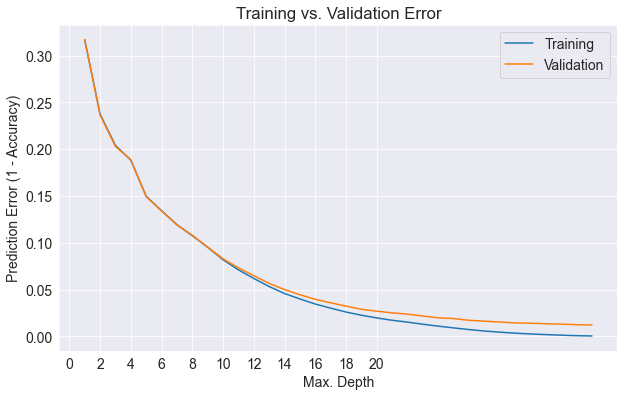

In [45]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [46]:
model_tree = DecisionTreeClassifier(max_depth=24, random_state=42)

In [47]:
model_tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=24, random_state=42)

In [48]:
model_tree.score(train_inputs, train_targets)

0.9890456838008499

In [49]:
model_tree.score(val_inputs, val_targets)

0.9801367460270183

In [50]:
model_tree = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [51]:
model_tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [52]:
model_tree.score(train_inputs, train_targets)

0.8420239781487316

In [53]:
model_tree.score(val_inputs, val_targets)

0.8422257964165393

In [54]:
model_tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

In [55]:
model_tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

In [56]:
model_tree.score(train_inputs, train_targets)

0.7611760500920031

In [57]:
model_tree.score(val_inputs, val_targets)

0.7622896024039766

In [58]:
model_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

In [59]:
model_tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

In [60]:
model_tree.score(train_inputs, train_targets)

0.7933947569311147

In [61]:
model_tree.score(val_inputs, val_targets)

0.7943117359332288

### After tuning of the max_depth and max_leaf_node

In [62]:
model_tree = DecisionTreeClassifier(max_depth=24, max_leaf_nodes=5, random_state=42)

In [63]:
model_tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=24, max_leaf_nodes=5, random_state=42)

In [64]:
model_tree.score(train_inputs, train_targets)

0.7933947569311147

In [65]:
model_tree.score(val_inputs, val_targets)

0.7943117359332288

### Now let's test DecisionTreeClassifier with hyperparameter tuning for the test set

In [66]:
model_tree.score(test_inputs, sol_df['Prediction'])

0.8820009930486594

### Using the RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
forest = RandomForestClassifier(n_jobs=-1, random_state=42)

In [69]:
%%time
forest.fit(train_inputs, train_targets)

CPU times: user 4min 56s, sys: 448 ms, total: 4min 56s
Wall time: 41.3 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [70]:
forest.score(train_inputs, train_targets)

1.0

In [71]:
forest.score(val_inputs, val_targets)

0.9941356737687231

In [72]:
len(forest.estimators_)

100

### Using the RandomForestClassifier with Hyperparameter Tuning

In [73]:
model_forest = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [74]:
%%time
model_forest.fit(train_inputs, train_targets)

CPU times: user 24 s, sys: 87.7 ms, total: 24.1 s
Wall time: 3.87 s


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [75]:
model_forest.score(train_inputs, train_targets)

0.9997948134125839

In [76]:
model_forest.score(val_inputs, val_targets)

0.9929839889332354

In [77]:
model_forest.score(val_inputs, val_targets)

0.9929839889332354

### Testing the hyperparameters

In [78]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    return model.score(train_inputs, train_targets), model.score(val_inputs, val_targets) 

In [79]:
test_params(max_features='log2')

(1.0, 0.9938973941475877)

In [80]:
test_params(n_estimators=1000)

(1.0, 0.9943342401196693)

In [81]:
test_params(max_leaf_nodes=2**20)

(1.0, 0.9942217191874665)

In [82]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9993601708564444, 0.9906872381406246)

In [83]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.9551965157993673, 0.9524367400700278)

In [84]:
test_params(min_samples_split=4, min_samples_leaf=3)

(0.9975223167992657, 0.9871659948505126)

In [85]:
test_params(min_samples_split=2, min_samples_leaf=2)

(0.9993601708564444, 0.9906872381406246)

In [86]:
test_params(min_impurity_decrease=1e-7)

(0.9998940972452046, 0.9936326390129928)

In [87]:
test_params(max_samples=0.9)

(1.0, 0.9937451599451956)

In [88]:
test_params(class_weight='balanced')

(1.0, 0.9941886247956422)

In [89]:
test_params(class_weight={0 : 7, 1 : 5})

(1.0, 0.9940959604985339)

In [90]:
test_params(class_weight={0 : 9, 1 : 5})

(1.0, 0.9943342401196693)

In [91]:
test_params(min_impurity_decrease=1e-7,min_samples_split=2, min_samples_leaf=2)

(0.9990799698177149, 0.9903033431954621)

In [92]:
test_params(max_features='log2',n_estimators=1000,min_samples_split=2, min_samples_leaf=2)

(0.9993403140899203, 0.990356294222381)

### By hyperparameter tuning we have reached the validation accuracy of approximately 99%. Let's combine all these tuned parameters to our final RandomForestClassifier model.

In [93]:
model_forest = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000,min_samples_split=2, min_samples_leaf=2)

In [94]:
%%time
model_forest.fit(train_inputs, train_targets)

CPU times: user 56min 15s, sys: 4.65 s, total: 56min 20s
Wall time: 7min 34s


RandomForestClassifier(min_samples_leaf=2, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [95]:
model_forest.score(train_inputs, train_targets)

0.9994572483816735

In [96]:
model_forest.score(val_inputs, val_targets)

0.9908858044915708

### Let's predict if the driver is alert or not using the data of the test inputs with our above RandomForestClassifier model with hyperparameters tuning

In [97]:
pred_test_targets=model_forest.predict(test_inputs)

In [98]:
pred_test_targets

array([1, 1, 1, ..., 1, 1, 1], dtype=int16)

In [99]:
pd.value_counts(pred_test_targets)

1    117654
0      3186
dtype: int64

### Let's see the score of this model by compairing against the provided prediction in the sol_df

In [100]:
model_forest.score(test_inputs, sol_df['Prediction'])

0.7777060575968222

### Let's predict if the driver is alert or not using the data of the test inputs with our best model and create our submission file which is required for the submission of the results as told in the problem.
### Remember the submission should be provided in the format of submission_df file

In [101]:
submission_df['Prediction']=model_tree.predict(test_inputs)

In [102]:
submission_df

,TrialID,ObsNum,Prediction
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1
...,...,...,...
120835,99,1206,1
120836,99,1207,1
120837,99,1208,1
120838,99,1209,1


### Saving the best trained Model

In [103]:
import joblib

In [104]:
driver_alert = {
    'model': model_tree,
    'scaler': scaler,
    'train_inputs': train_inputs,
    'train_targets': train_targets,
}

In [105]:
joblib.dump(driver_alert, 'driver_alert.joblib')

['driver_alert.joblib']

### Saving a Copy

In [106]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "imvk9696/driver-alertness-detection" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/imvk9696/driver-alertness-detection


'https://jovian.ai/imvk9696/driver-alertness-detection'

### Submission

In [107]:
jovian.submit(assignment="zerotogbms-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "imvk9696/driver-alertness-detection" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/imvk9696/driver-alertness-detection
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model
